In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

data = pd.read_excel('/content/drive/MyDrive/KHUDA/최종.xlsx')
index1 = data[data['Income'] > 0.2].index
data = data.drop(index1)
data.head()

,Unnamed: 0,Income,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,0.083844,0.0,0.425318,0.442211,0.316522,0.664093,0.335878,0.357143,0.307692,0.538462
1,1,0.066088,0.5,0.007368,0.005025,0.003478,0.007722,0.003817,0.035714,0.153846,0.384615
2,2,0.104131,0.0,0.285332,0.246231,0.073623,0.428571,0.080153,0.071429,0.769231,0.307692
3,3,0.036432,0.5,0.007368,0.020101,0.011594,0.038610,0.011450,0.000000,0.307692,0.461538
4,4,0.084078,0.5,0.115874,0.216080,0.068406,0.177606,0.103053,0.107143,0.461538,0.384615


In [4]:
import numpy as np

full_data = data[['Income','Kidhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

train = data[['Kidhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].to_numpy()
# print(train)
target = data['Income']

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(train)

# print(train.shape)
train_pca = pca.transform(train)

train_df = pd.DataFrame(train_pca,columns = ['Column_A','Column_B','Column_C','Column_D','Column_E'])
train_df

,Column_A,Column_B,Column_C,Column_D,Column_E
0,0.514761,0.322077,-0.167873,0.447231,-0.150742
1,-0.479079,0.093189,-0.053667,0.001778,0.131345
2,0.424603,-0.005190,-0.006188,-0.142530,-0.072906
3,-0.416271,0.085630,0.037580,-0.072839,0.034045
4,-0.120798,0.237584,0.114185,-0.080921,0.015368
...,...,...,...,...,...
2195,0.267543,-0.031355,-0.108622,0.280302,-0.008962
2196,-0.539926,0.264609,0.549026,0.040851,0.139343
2197,0.518462,-0.296747,0.364211,-0.081390,-0.158229
2198,0.412010,-0.081947,0.004920,-0.167765,0.055300


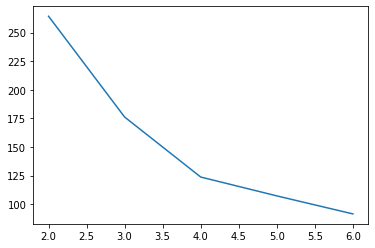

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(2,7):
  km_t = KMeans(n_clusters=k,random_state=42)
  km_t.fit(train_df[['Column_A','Column_B','Column_C']])
  inertia.append(km_t.inertia_)
plt.plot(range(2,7),inertia)
plt.show()

In [6]:
km = KMeans(n_clusters=4,random_state=42)
km.fit(train_df)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2, 3], dtype=int32), array([872, 479, 358, 491]))


In [7]:
print(np.sum(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

0.8920775679114338


array([0.55188274, 0.12446831, 0.10236116, 0.0613175 , 0.05204786])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


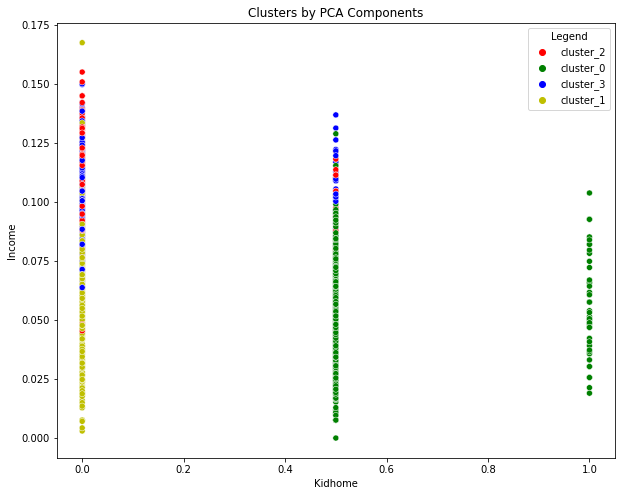

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


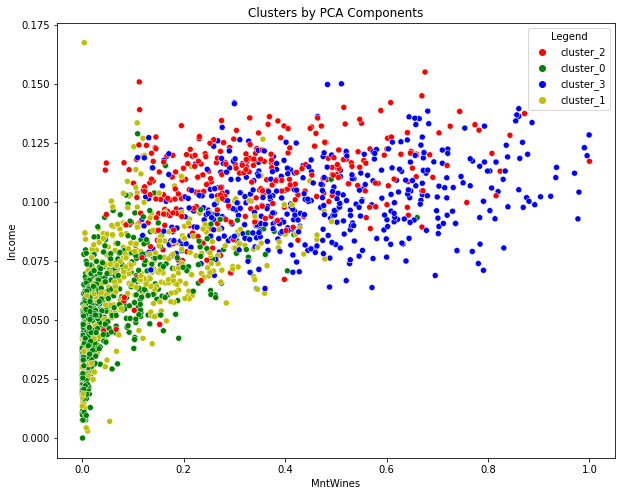

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


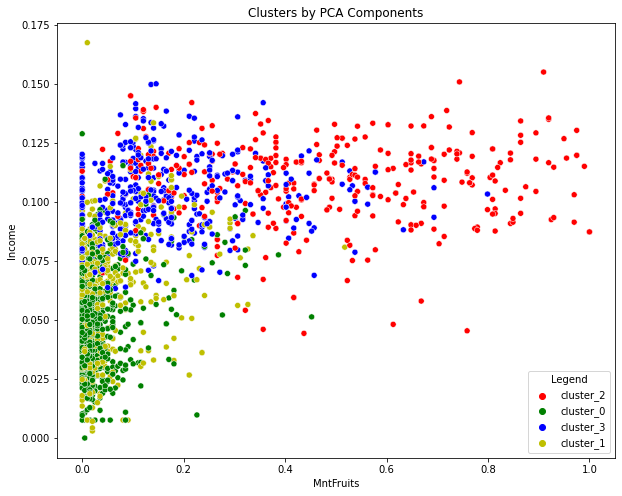

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


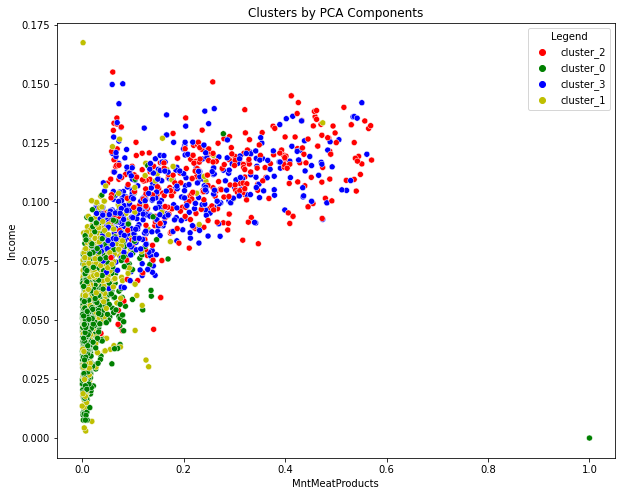

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


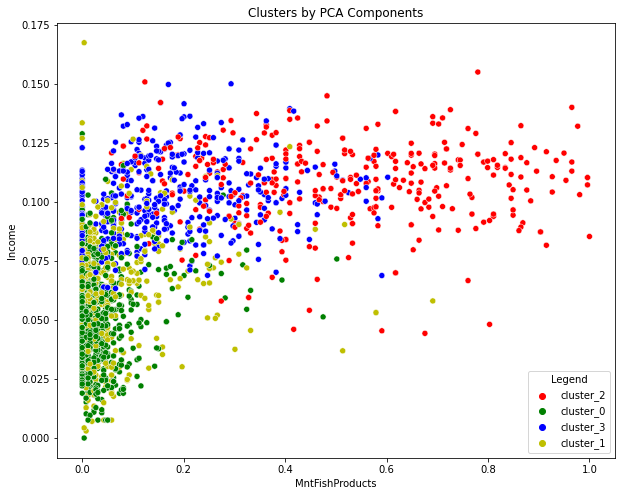

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


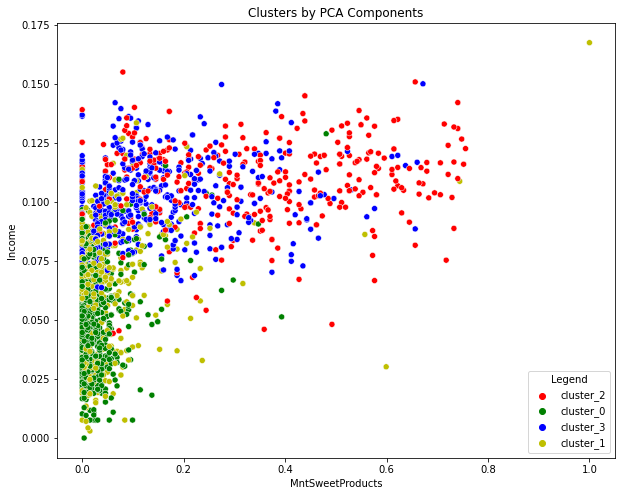

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


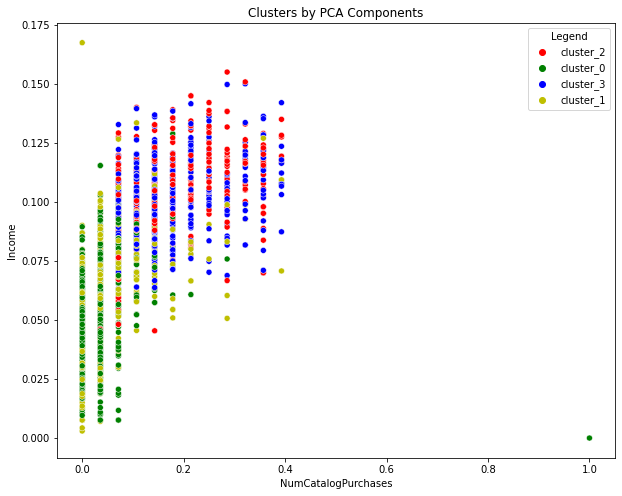

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


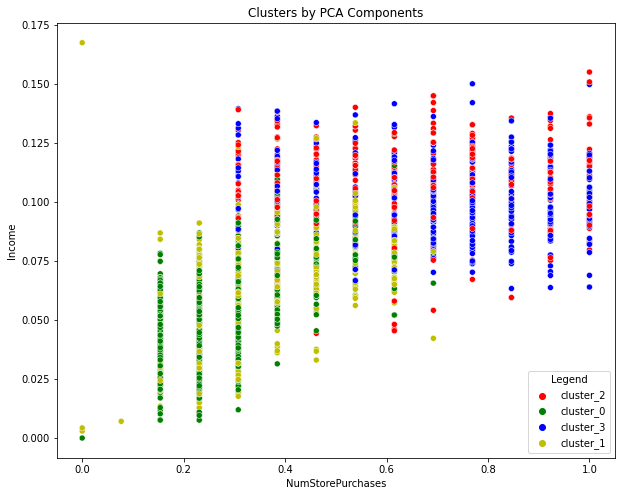

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


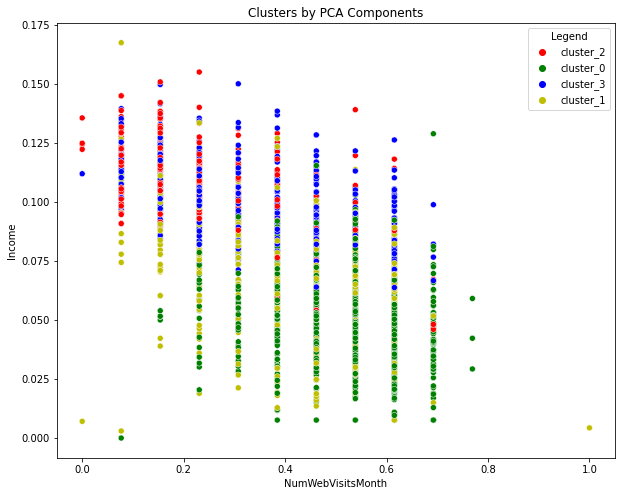

In [8]:
import seaborn as sns

full_data['cluster'] = km.labels_

full_data['Legend'] = full_data['cluster'].map({0:'cluster_0', 
           1:'cluster_1',
           2:'cluster_2',
           3:'cluster_3'})

x_axis = full_data['Kidhome']
y_axis = full_data['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = full_data['Legend'] , palette = ['r', 'g', 'b', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

x_axis = full_data['MntWines']
y_axis = full_data['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = full_data['Legend'] , palette = ['r', 'g', 'b', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

x_axis = full_data['MntFruits']
y_axis = full_data['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = full_data['Legend'] , palette = ['r', 'g', 'b', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

x_axis = full_data['MntMeatProducts']
y_axis = full_data['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = full_data['Legend'] , palette = ['r', 'g', 'b', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

x_axis = full_data['MntFishProducts']
y_axis = full_data['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = full_data['Legend'] , palette = ['r', 'g', 'b', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

x_axis = full_data['MntSweetProducts']
y_axis = full_data['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = full_data['Legend'] , palette = ['r', 'g', 'b', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

x_axis = full_data['NumCatalogPurchases']
y_axis = full_data['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = full_data['Legend'] , palette = ['r', 'g', 'b', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

x_axis = full_data['NumStorePurchases']
y_axis = full_data['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = full_data['Legend'] , palette = ['r', 'g', 'b', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

x_axis = full_data['NumWebVisitsMonth']
y_axis = full_data['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = full_data['Legend'] , palette = ['r', 'g', 'b', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

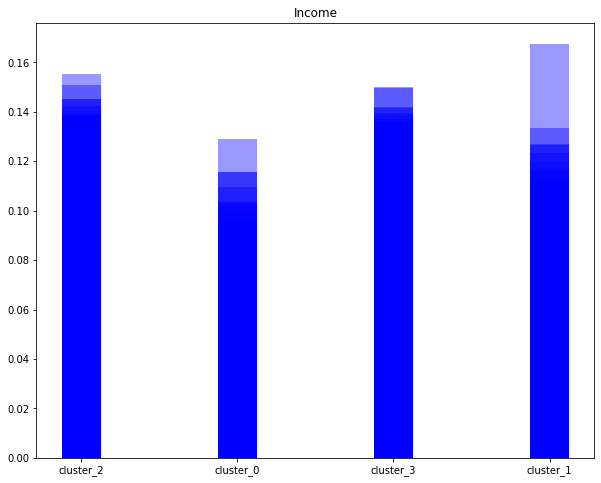

In [11]:
bar_width = 0.25
plt.figure(figsize = (10, 8))

# plt.bar(full_data['Legend'], full_data['NumCatalogPurchases'], bar_width, alpha=0.4, color='red')
# plt.title('Catalog')
# plt.show()
# plt.bar(full_data['Legend'], full_data['NumStorePurchases'], bar_width,alpha=0.4,color='blue', label='shop B')
# plt.title('Store')
# plt.show()
# plt.bar(full_data['Legend'], full_data['NumWebVisitsMonth'],bar_width,alpha=0.4,color='green', label='shop C')
# plt.title('Web')
# plt.show()
plt.bar(full_data['Legend'], full_data['Income'],bar_width,alpha=0.4,color='blue', label='shop C')
plt.title('Income')
plt.show()

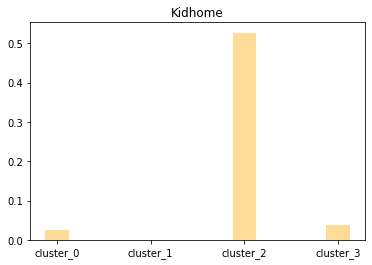

In [ ]:
kid_list = []
clu_list = ['cluster_0','cluster_1','cluster_2','cluster_3']

for i in range(4):
  kid_list.append(full_data[km.labels_==i]['Kidhome'].mean())

plt.bar(clu_list, kid_list, bar_width, alpha=0.4, color='orange')
plt.title('Kidhome')
plt.show()

In [ ]:
df_pca = pd.DataFrame(data = pca.components_, columns = full_data[['Kidhome','MntWines','MntFruits',
          'MntMeatProducts','MntFishProducts','MntSweetProducts','NumCatalogPurchases',
          'NumStorePurchases','NumWebVisitsMonth']].columns,
              index = ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5'])
df_pca

,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Component 1,-0.466597,0.389631,0.315229,0.217792,0.344102,0.237881,0.178024,0.457118,-0.260824
Component 2,0.592874,-0.249017,0.453307,0.128075,0.503287,0.274949,0.028325,-0.151525,-0.109283
Component 3,0.603644,0.498300,-0.088292,0.002369,-0.136540,-0.056019,0.016054,0.532261,0.272340
Component 4,-0.024013,0.633831,0.005804,0.184387,0.131024,0.009014,0.160120,-0.671506,0.264278
Component 5,0.250901,0.137298,-0.383192,0.249915,-0.130980,-0.061065,0.180194,-0.113005,-0.801736


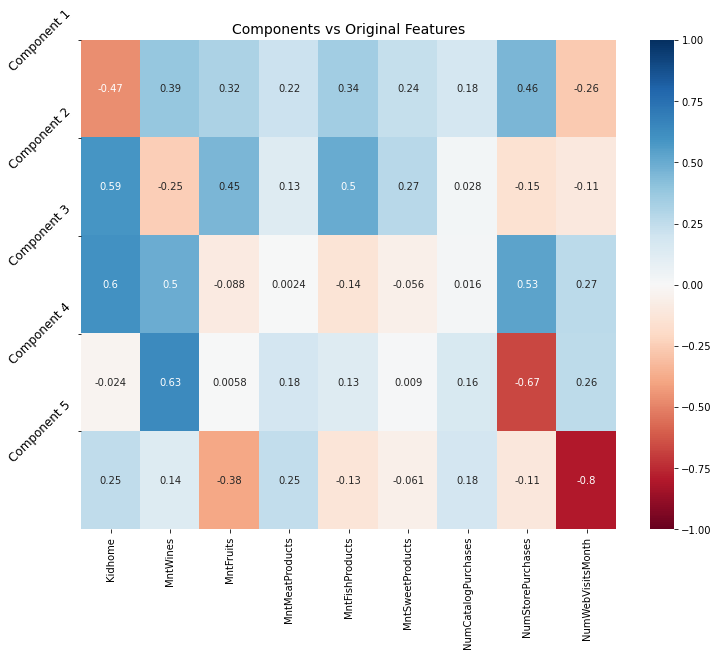

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2,3,4], 
           ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

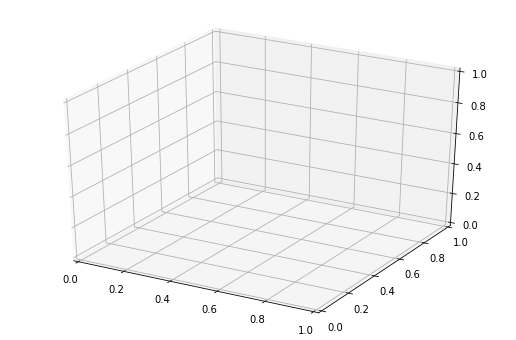

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

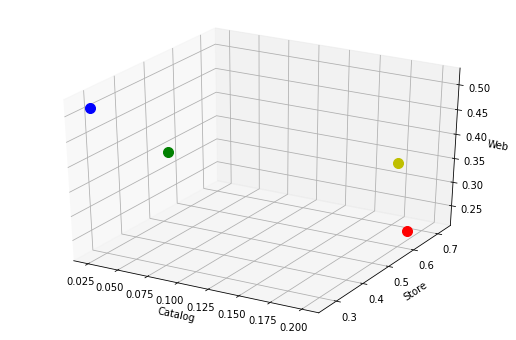

In [ ]:
#클러스터 평균 구매매체

x_0data = full_data[km.labels_==0]['NumCatalogPurchases']
y_0data = full_data[km.labels_==0]['NumStorePurchases']
z_0data = full_data[km.labels_==0]['NumWebVisitsMonth']

x_1data = full_data[km.labels_==1]['NumCatalogPurchases']
y_1data = full_data[km.labels_==1]['NumStorePurchases']
z_1data = full_data[km.labels_==1]['NumWebVisitsMonth']

x_2data = full_data[km.labels_==2]['NumCatalogPurchases']
y_2data = full_data[km.labels_==2]['NumStorePurchases']
z_2data = full_data[km.labels_==2]['NumWebVisitsMonth']

x_3data = full_data[km.labels_==3]['NumCatalogPurchases']
y_3data = full_data[km.labels_==3]['NumStorePurchases']
z_3data = full_data[km.labels_==3]['NumWebVisitsMonth']

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Catalog', fontsize=10, rotation=150)
ax.set_ylabel('Store', fontsize=10, rotation=150)
ax.set_zlabel('Web', fontsize=10, rotation=-10)

x = x_0data.mean()
y = y_0data.mean()
z = z_0data.mean()
ax.scatter(x, y, z,s = 100, color='r',label='cluster_0')

x = x_1data.mean()
y = y_1data.mean()
z = z_1data.mean()
ax.scatter(x, y, z,s = 100, color='g',label='cluster_1')

x = x_2data.mean()
y = y_2data.mean()
z = z_2data.mean()
ax.scatter(x, y, z,s = 100, color='b',label='cluster_2')

x = x_3data.mean()
y = y_3data.mean()
z = z_3data.mean()
ax.scatter(x, y, z,s = 100, color='y',label='cluster_3')

In [ ]:
#클러스터별 describe

a = full_data[km.labels_==0]['Income'] #cluster_0
b = full_data[km.labels_==1]['Income'] #cluster_1
c = full_data[km.labels_==2]['Income'] #cluster_2
d = full_data[km.labels_==3]['Income'] #cluster_3


d.describe()

count    491.000000
mean       0.100649
std        0.015775
min        0.063356
25%        0.089824
50%        0.099681
75%        0.112236
max        0.150121
Name: Income, dtype: float64